**TP : Étapes de Construction d'un CNN**

**Objectifs**:

    

1.   Comprendre le fonctionnement des convolutions, max pooling et des fonctions  d'activation.
2.   Implémenter ces concepts de manière pratique.
3.     Construire un réseau de neurones convolutif (CNN) étape par étape et l'appliquer sur un jeu de données simple.


    


**Étape 1 : Compréhension de la Convolution 2D**



1.       Commencez par expliquer la convolution en appliquant un filtre (par exemple, 3x3) sur une image en utilisant NumPy.
2.      Objectif : Observer comment un filtre appliqué à une image change celle-ci (par exemple, détecter les bords).

In [42]:
#CODE ICI
import numpy as np
import matplotlib.pyplot as plt

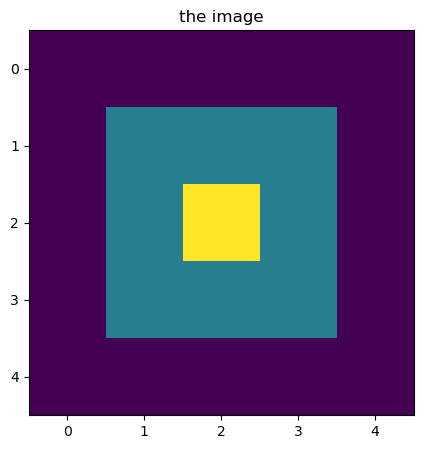

In [43]:
image = np.array([
    [10, 10, 10, 10, 10],
    [10, 40, 40, 40, 10],
    [10, 40, 80, 40, 10],
    [10, 40, 40, 40, 10],
    [10, 10, 10, 10, 10]
])
plt.figure(figsize=(5,5))
plt.title("the image")
plt.imshow(image)
plt.show()

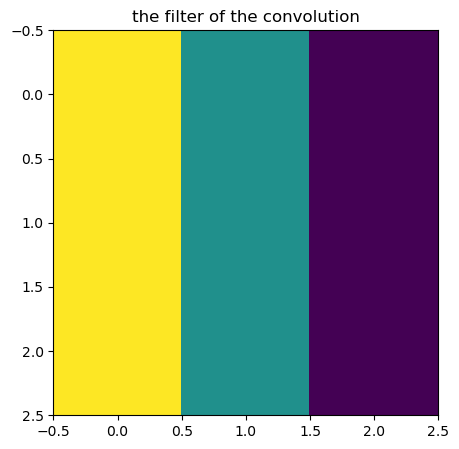

In [44]:
filter = np.array([ #horizontal 
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])
plt.figure(figsize=(5,5))
plt.title("the filter of the convolution")
plt.imshow(filter)
plt.show()

In [45]:
# convolution from scratch with numpy
def conv(image,filter):
    h,l = image.shape
    filter_shape = filter.shape[0]
    pad = filter_shape // 2
    # print(f"the shape before adding the padding: {image.shape}")
    image = np.pad(image, pad, mode='constant', constant_values=0)
    # print(f"the new shape after adding the padding: {image.shape}")
    result = np.zeros(shape=(image.shape[0],image.shape[0]))
    for i in range(h):
        for j in range(l):
            sous_matrice = image[i:i+filter_shape, j:j+ filter_shape]
            convolution = np.sum(sous_matrice*filter)
            result[i,j]=convolution
    result = result[:-pad-1, :-pad-1]
    return result

[[ -50.  -30.    0.   30.   50.]
 [ -90. -100.    0.  100.   90.]
 [-120. -130.    0.  130.  120.]
 [ -90. -100.    0.  100.   90.]
 [ -50.  -30.    0.   30.   50.]]


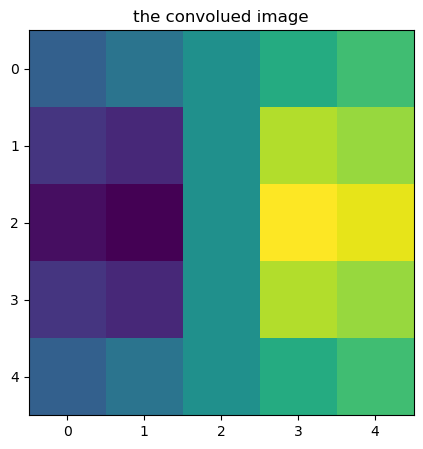

In [46]:
new_image = conv(image,filter)
print(new_image)
plt.figure(figsize=(5,5))
plt.title("the convolued image")
plt.imshow(new_image)
plt.show()

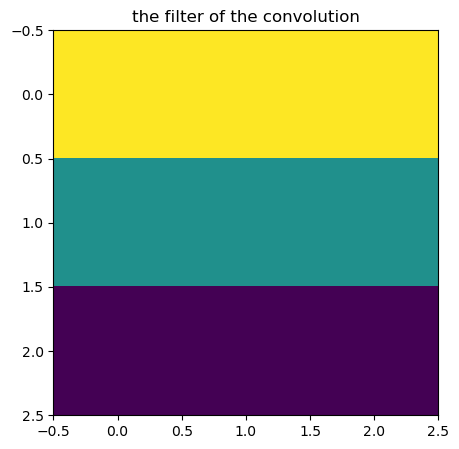

In [47]:
filter = np.array([ #vertical 
    [1, 1, 1],
    [0, 0, 0],
    [-1,-1,-1]
])
plt.figure(figsize=(5,5))
plt.title("the filter of the convolution")
plt.imshow(filter)
plt.show()

[[ -50.  -90. -120.  -90.  -50.]
 [ -30. -100. -130. -100.  -30.]
 [   0.    0.    0.    0.    0.]
 [  30.  100.  130.  100.   30.]
 [  50.   90.  120.   90.   50.]]


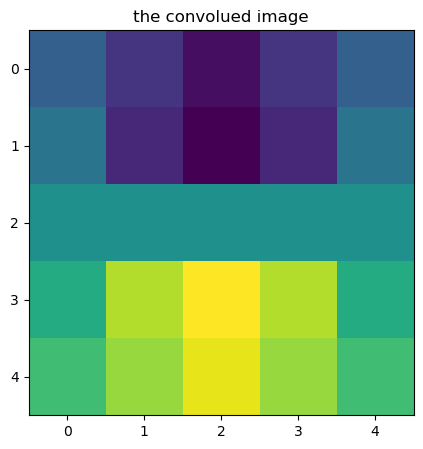

In [48]:
new_image = conv(image,filter)
print(new_image)
plt.figure(figsize=(5,5))
plt.title("the convolued image")
plt.imshow(new_image)
plt.show()

**Étape 2 : Max Pooling**


1.   Implémentez une couche de max pooling pour réduire la dimension de l'image tout en conservant les caractéristiques importantes.

In [49]:
def max_pooling(image, size):
    i, j = 0, 0 
    new_image = [] 

    while i <= image.shape[0] - size: 
        row = [] 
        while j <= image.shape[1] - size:  
            sous_matrice = image[i:i + size, j:j + size] 
            result = np.max(sous_matrice)  
            row.append(result) 
            j += size 
        new_image.append(row)  # Ajouter la ligne complète
        j = 0  
        i += size
    return np.array(new_image)

In [50]:
image = np.array([
    [ -50,  -30,    0,   30,   50,    0],
    [ -90, -100,    0,  100,   90,    0],
    [-120, -130,    0,  130,  120,    0],
    [ -90, -100,    0,  100,   90,    0],
    [ -50,  -30,    0,   30,   50,    0],
    [   0,    0,    0,    0,    0,    0]
])
size = 2
max_pooling(image,size)

array([[-30, 100,  90],
       [-90, 130, 120],
       [  0,  30,  50]])



Étape 3 : Fonction d'Activation

1. Implémentez des fonctions d'activation, comme ReLU (Rectified Linear Unit).



In [51]:
#CODE ICI
def relu(x):
    return np.maximum(0,x)
def linear(x):
    return x
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

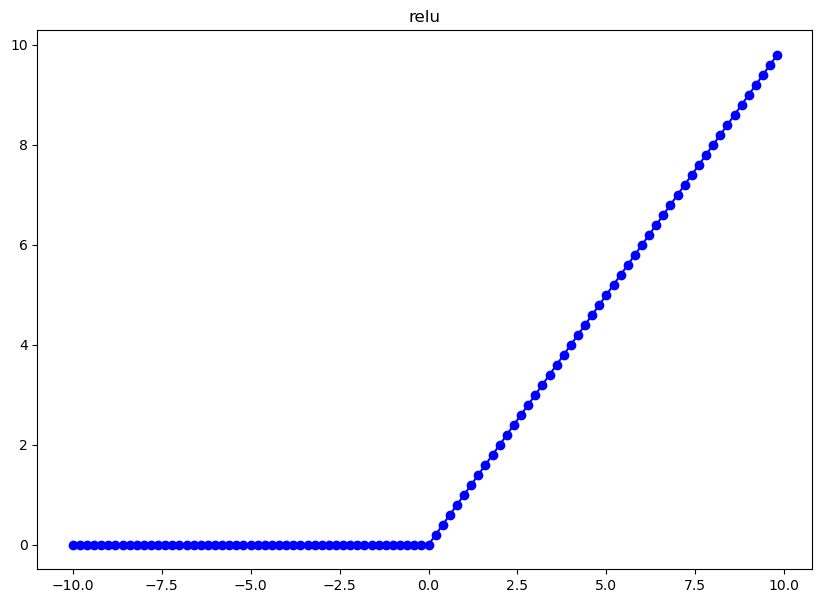

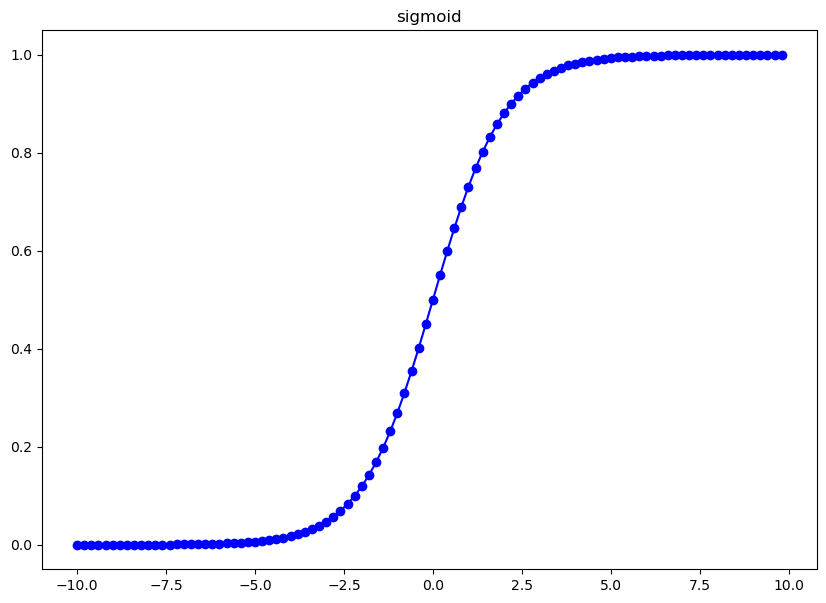

In [52]:
x = np.arange(-10,10,0.2)
relu = relu(x)
sigmoid = sigmoid(x)

plt.figure(figsize=(10,7))
plt.title("relu")
plt.plot(x,relu,marker='o', linestyle='-', color='b')
plt.show()

plt.figure(figsize=(10,7))
plt.title("sigmoid")
plt.plot(x,sigmoid,marker='o', linestyle='-', color='b')
plt.show()

**Étape 4 : Construire un CNN avec Keras**

1. Utilisez les concepts précédents pour construire un CNN simple qui classifie les images du dataset MNIST (chiffres manuscrits).

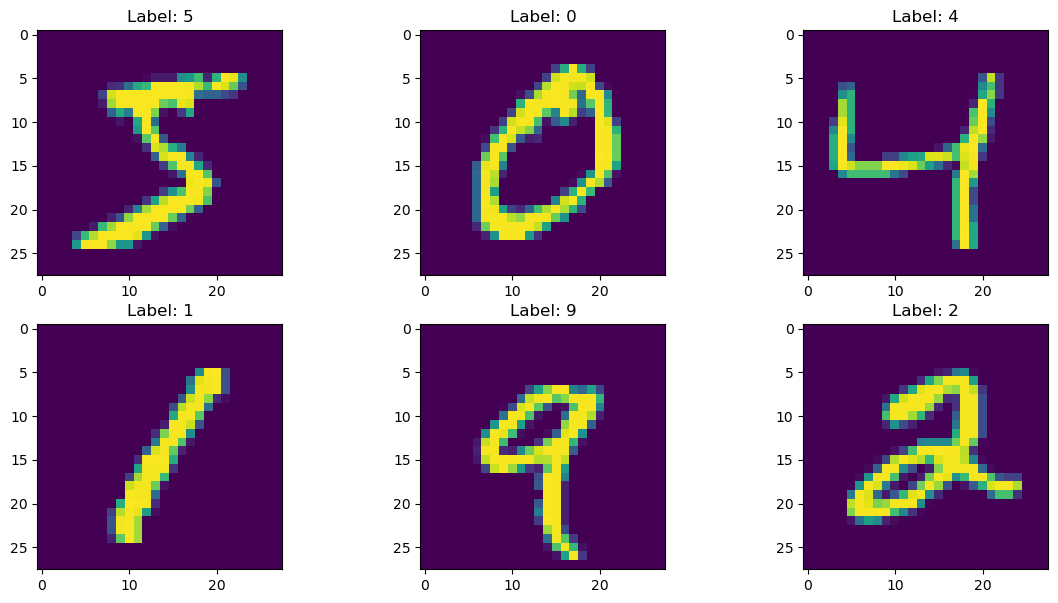

In [53]:
#CODE ICI
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(14, 7))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
plt.show()

In [54]:
classes = len(np.unique(y_train))
print(classes)

10


In [55]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(x_train[0].shape[0], x_train[0].shape[0], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.summary()

C:\Users\raid benlala\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)
print(y_train[0])

5


In [58]:
history = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=10, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.7773 - loss: 3.6960 - val_accuracy: 0.9719 - val_loss: 0.0923
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9756 - loss: 0.0788 - val_accuracy: 0.9811 - val_loss: 0.0595
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.9818 - val_loss: 0.0578
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - accuracy: 0.9891 - loss: 0.0326 - val_accuracy: 0.9844 - val_loss: 0.0560
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9833 - val_loss: 0.0542
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9944 - loss: 0.0197 - val_accuracy: 0.9853 - val_loss: 0.0542
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9844 - val_loss: 0.0608
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.9959 - loss: 0.0132 - 

**Étape 5 : Évaluation du Modèle**

1. Évaluer la performance du modèle sur le jeu de données de test.

In [59]:
#CODE ICI
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"{test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9835 - loss: 0.0657
0.9876


**Étape 6 : Visualisation des Prédictions**

1. Choisissez quelques exemples du jeu de données de test et affichez l'image, la prédiction du modèle et le label réel.

In [60]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


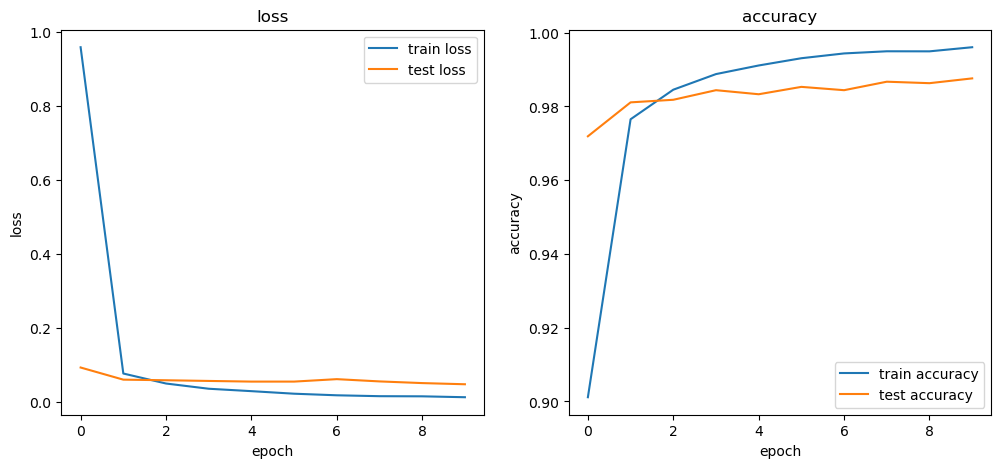

In [61]:
#CODE ICI
plt.figure(figsize=(12, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [62]:
# show some predictions 
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [67]:
print("tje predicted classes")
for i in range(10):
    print(f"the predicted classe : {np.argmax(predictions[i])}")
    print(f"the real classe : {y_test[i]}")

tje predicted classes
the predicted classe : 7
the real classe : 7
the predicted classe : 2
the real classe : 2
the predicted classe : 1
the real classe : 1
the predicted classe : 0
the real classe : 0
the predicted classe : 4
the real classe : 4
the predicted classe : 1
the real classe : 1
the predicted classe : 4
the real classe : 4
the predicted classe : 9
the real classe : 9
the predicted classe : 5
the real classe : 5
the predicted classe : 9
the real classe : 9
